In [11]:
#Load and clean GEO series matrix
import gzip
import pandas as pd
import numpy as np
from io import StringIO

In [8]:
with gzip.open("GSE161369-GPL16791_series_matrix.txt.gz", "rt") as f:
    lines = f.readlines()

In [9]:
start = [i for i,l in enumerate(lines) if l.startswith("!series_matrix_table_begin")][0] + 1
end   = [i for i,l in enumerate(lines) if l.startswith("!series_matrix_table_end")][0]

expr = pd.read_csv(
    StringIO("".join(lines[start:end])),
    sep="\t",
    index_col=0
)

expr = expr.apply(pd.to_numeric, errors="coerce")
expr = np.log2(expr + 1)

Heatmap

In [12]:
import matplotlib.pyplot as plt

In [15]:
# Force everything to numeric
expr = expr.apply(pd.to_numeric, errors="coerce")

# Drop genes with ANY missing values
expr = expr.dropna()

# Ensure float type
expr = expr.astype(float)

expr.dtypes.head()

GSM4905359    float64
GSM4905360    float64
GSM4905361    float64
GSM4905362    float64
GSM4905363    float64
dtype: object

In [16]:
top_genes = expr.var(axis=1).sort_values(ascending=False).head(30).index

C:\Users\user\AppData\Local\Temp\ipykernel_4256\3357699516.py:2: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(expr.loc[top_genes].values, aspect="auto", cmap="viridis")


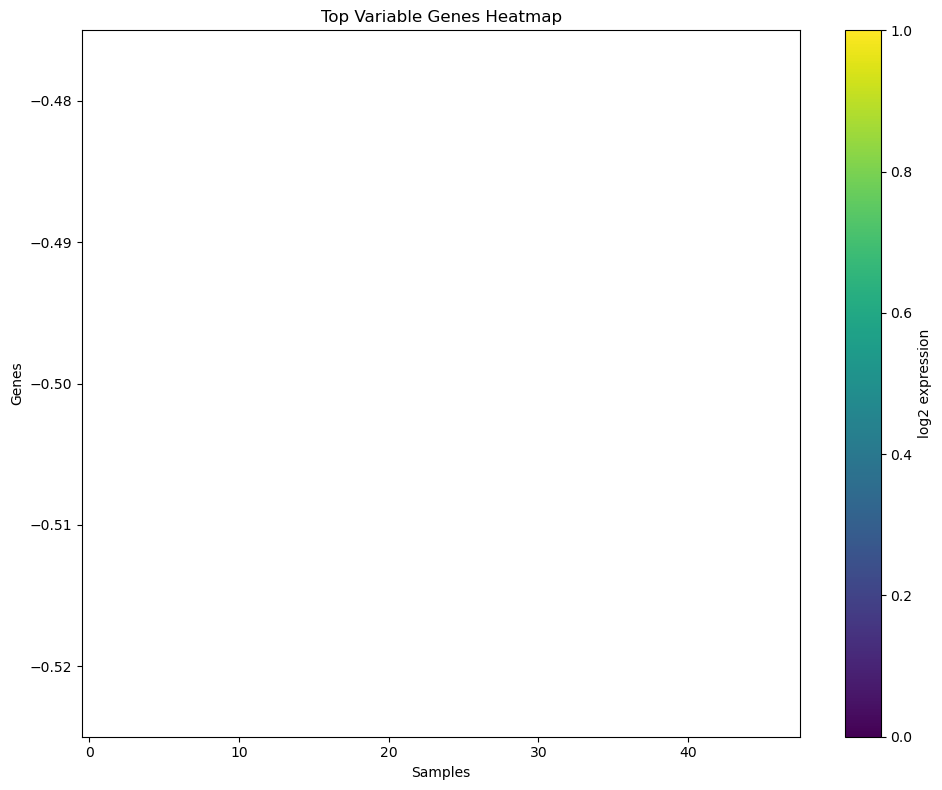

In [17]:
plt.figure(figsize=(10,8))
plt.imshow(expr.loc[top_genes].values, aspect="auto", cmap="viridis")
plt.colorbar(label="log2 expression")
plt.title("Top Variable Genes Heatmap")
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.tight_layout()
plt.show()

Volcano plot — differential expression intuition

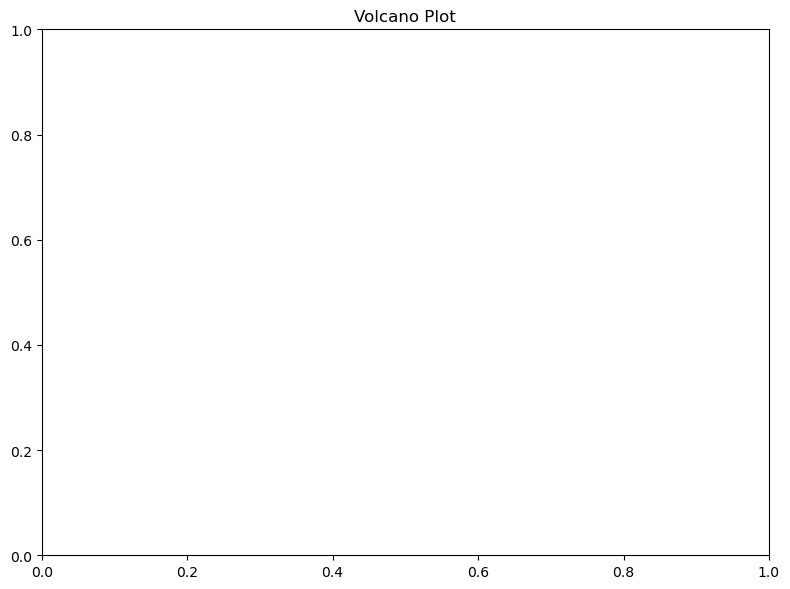

In [31]:
from scipy.stats import ttest_ind

import os
import matplotlib.pyplot as plt

# Ensure the directory exists
os.makedirs("figures", exist_ok=True)

# Your plotting code
plt.figure(figsize=(8,6))
# ... your plotting commands, e.g., plt.scatter, plt.title, etc.
plt.title("Volcano Plot")
plt.tight_layout()

# Save the figure
plt.savefig("figures/volcano.png")
plt.show()